In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import anndata
import os

from imblearn.over_sampling import SMOTE

In [2]:
def update_using_map(exp_df, map_filepath):
    map_df = pd.read_csv(map_filepath)

    # Creating a dictionary to map sample names to cell types
    sample_to_celltype = dict(zip(map_df['sample'], map_df['cell type']))

    # Replacing the headers of the expressions_df
    new_headers = [sample_to_celltype.get(col, col) for col in exp_df.columns[1:]]  # Exclude the first column which is 'symbol'
    new_headers = [exp_df.columns[0]] + new_headers  # Include the first column (gene symbols)

    # Applying the new headers to the expressions dataframe
    exp_df.columns = new_headers

In [3]:
def display_barplot(input_df):
    # Drop the 'symbol' column as it is not needed
    df = input_df.drop(columns=['symbol'])
    
    # Group columns by unique cell types and sum the non-zero counts
    unique_cell_types = df.columns.unique()
    non_zero_counts = df.groupby(df.columns, axis=1).apply(lambda x: (x != 0).sum().sum())
    
    # Plotting the bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(non_zero_counts.index, non_zero_counts.values)
    plt.xlabel('Cell Types')
    plt.ylabel('Number of Non-Zero Values')
    plt.title('Non-Zero Gene Expression Counts per Cell Type')
    y_max = int(np.ceil(non_zero_counts.max()))  # Find the maximum y value and round up
    plt.yticks(np.arange(0, y_max + 1, y_max // 10))  # Set y-ticks at regular intervals
    plt.xticks(rotation=45)
    plt.show()

In [4]:
# Load the expressions file
expressions_file_path = '../data/fantom5/9606_symbol.csv'
expressions_df = pd.read_csv(expressions_file_path)
expressions_df['symbol'] = expressions_df['symbol'].str.upper()

update_using_map(expressions_df, "../data/fantom5/map.csv")
update_using_map(expressions_df, "../data/fantom5/9606_map.csv")

In [5]:
expressions_df = expressions_df.fillna(0)

In [6]:
expressions_df.head()

,symbol,hereditary spherocytosis cell line,malignant epithelioid hemangioendothelioma,prostate cancer cell line,prostate cancer cell line,gastric cancer cell line,rhabdomyosarcoma cell line,rhabdomyosarcoma cell line,osteosarcoma cell line,osteosarcoma cell line,...,CD8+ Cytotoxic T cells,CD8+ Cytotoxic T cells,CD8+ Cytotoxic T cells,CD19+ B cells,CD19+ B cells,CD19+ B cells,CD19+ B cells,CD19+ B cells,CD19+ B cells,CD19+ B cells
0,A1BG,0,24,72,14,23,185,42,6,193,...,45,109,44,57,39,80,52,57,53,38
1,A1BG-AS1,0,7,27,9,1,75,25,3,51,...,5,31,4,23,12,16,18,21,13,8
2,A1CF,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A2M,4,1,5,28,49,5,9,0,313,...,0,1,0,1,1,1,0,0,3,0
4,A2M-AS1,0,0,13,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
columns_to_drop = expressions_df.columns[(expressions_df == 0).all()]
expressions_df.drop(columns=columns_to_drop, inplace=True)

In [8]:
# Filtering columns that start with 'CD'
cd_columns = [col for col in expressions_df.columns if col.startswith('CD')]

# Selecting the filtered columns
df_cd = expressions_df[cd_columns]

df_cd.columns.unique()

Index(['CD34+ cells', 'CD4+ Helper T cells', 'CD4+/CD25+ Regulatory T cells',
       'CD4+/CD45RA+/CD25- Naïve T cells', 'CD4+/CD45RO+ Memory T cells',
       'CD8+ Cytotoxic T cells', 'CD19+ B cells', 'CD56+ NK cells',
       'CD14+ Monocytes'],
      dtype='object')

In [9]:
cd_columns.insert(0, 'symbol')

In [10]:
expressions_df = expressions_df[cd_columns]

/tmp/ipykernel_102011/2584426900.py:7: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  non_zero_counts = df.groupby(df.columns, axis=1).apply(lambda x: (x != 0).sum().sum())


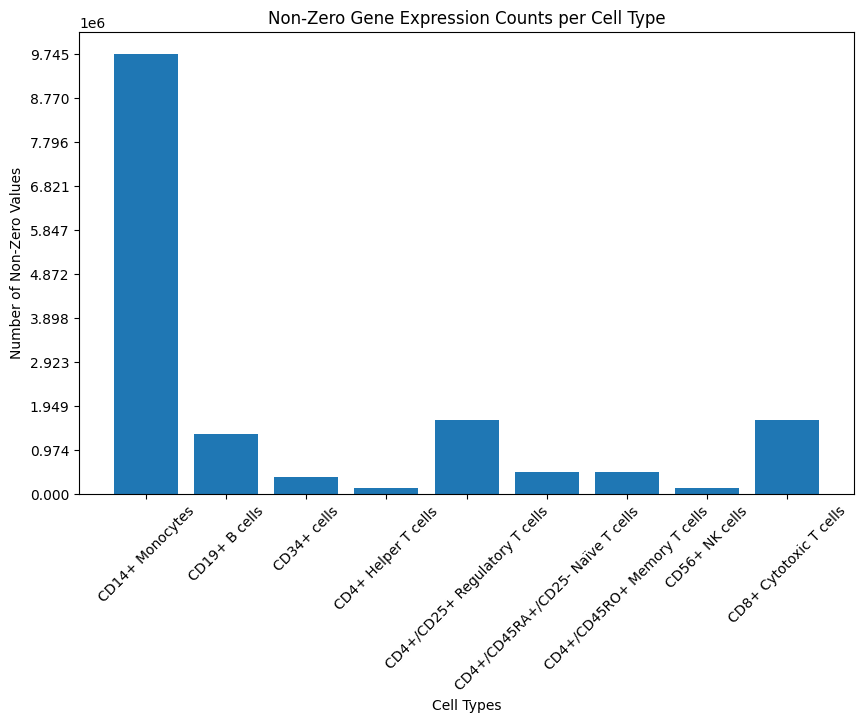

In [11]:
display_barplot(expressions_df)

In [15]:
folder_path = '../data/preprocessed'

os.makedirs(folder_path, exist_ok=True)

In [16]:
# Saving the modified expressions file
output_file_path = f'{folder_path}/gene_expressions.csv'
expressions_df.to_csv(output_file_path, index=False)

## Augment with Gaussian Noise

In [17]:
expressions_tr = expressions_df.transpose()

In [18]:
expressions_tr

,0,1,2,3,4,5,6,7,8,9,...,22039,22040,22041,22042,22043,22044,22045,22046,22047,22048
symbol,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A4GALT,A4GNT,AAAS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
CD34+ cells,186,22,0,3,7,0,0,0,0,165,...,56,185,0,0,112,0,36,546,51,123
CD34+ cells,50,8,0,0,1,0,0,1,0,23,...,12,3,0,0,34,0,9,283,61,76
CD34+ cells,80,22,0,6,10,0,0,9,0,152,...,58,203,1,0,67,2,56,343,47,82
CD34+ cells,156,13,0,12,6,0,0,12,0,270,...,67,441,0,0,102,0,77,640,76,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CD19+ B cells,80,16,0,1,0,0,0,2,0,73,...,16,13,0,0,63,3,81,87,87,89
CD19+ B cells,52,18,0,0,0,0,0,1,0,93,...,24,10,0,0,68,1,61,71,59,101
CD19+ B cells,57,21,0,0,0,0,0,0,0,61,...,9,2,0,1,47,3,43,62,62,84
CD19+ B cells,53,13,0,3,0,0,0,0,0,62,...,9,5,0,0,36,1,29,67,31,44


In [19]:
# Set a seed for reproducibility
np.random.seed(42)

# Exclude the first row called 'symbol'
df_filtered = expressions_tr[expressions_tr.index != 'symbol']
df_filtered = df_filtered[df_filtered.index != 'CD14+ Monocytes']

# Count the number of rows for each index
index_counts = df_filtered.index.value_counts()

std_df = df_filtered.groupby(df_filtered.index).std()

# Initialize a list to hold the new rows
new_rows_list = []

# Loop over each index and generate 300 more rows
for index, count in index_counts.items():
    print(f"Cell type {index}")
    
    # Generate the new rows
    for _ in range(300):
        # Generate positive integer Gaussian noise based on the standard deviation
        new_row = (std_df.loc[index] * np.abs(np.random.randn(len(df_filtered.columns)))).astype(int)
        
        # Convert the new row to a DataFrame and set the index
        new_row_df = pd.DataFrame([new_row], index=[index])
        
        # Append the new row to the list
        new_rows_list.append(new_row_df)

# Concatenate the original dataframe with the new rows
df_with_noise = pd.concat([expressions_tr] + new_rows_list)

# Display the updated dataframe
print(df_with_noise)

Cell type CD4+/CD25+ Regulatory T cells
Cell type CD8+ Cytotoxic T cells
Cell type CD19+ B cells
Cell type CD4+/CD45RA+/CD25- Naïve T cells
Cell type CD4+/CD45RO+ Memory T cells
Cell type CD34+ cells
Cell type CD4+ Helper T cells
Cell type CD56+ NK cells
               0         1     2     3        4      5          6       7      \
symbol          A1BG  A1BG-AS1  A1CF   A2M  A2M-AS1  A2ML1  A2ML1-AS1  A4GALT   
CD34+ cells      186        22     0     3        7      0          0       0   
CD34+ cells       50         8     0     0        1      0          0       1   
CD34+ cells       80        22     0     6       10      0          0       9   
CD34+ cells      156        13     0    12        6      0          0      12   
...              ...       ...   ...   ...      ...    ...        ...     ...   
CD56+ NK cells    18         8     0     0        0      0          0       1   
CD56+ NK cells     6        11     0     1        0      0          0       0   
CD56+ NK cells  

In [20]:
df_with_noise = df_with_noise.transpose()

/tmp/ipykernel_102011/2584426900.py:7: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  non_zero_counts = df.groupby(df.columns, axis=1).apply(lambda x: (x != 0).sum().sum())


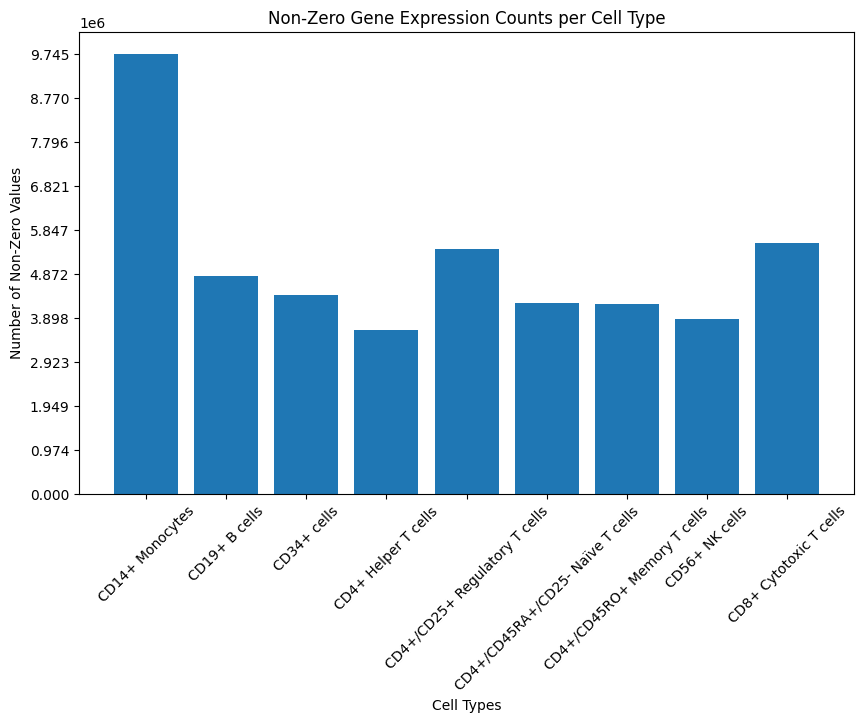

In [21]:
display_barplot(df_with_noise)

In [22]:
output_file_path = f'{folder_path}/gene_expressions_augmented.csv'
df_with_noise.to_csv(output_file_path, index=False)